## Expert Level

In [3]:
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from skimage import data, io, filters
from skimage import feature as ft
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

### 1.Reading images

In [5]:
dataset_path = "../images"

X = []
y = []
for i in glob.glob(dataset_path + '/*.png', recursive=True):
    
    label = i.split("images")[1][1:4]
    y.append(label)
    # write code to read ecah file i, and append it to list X
    X.append(cv2.imread(i))


# you should have X, y with 5998 entries on each.
print(len(y))
print(len(X))

5998
5998


### 2.Pre-processing images

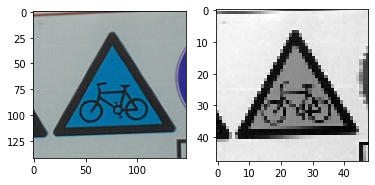

In [6]:
X_processed=[]
for x in X:
    # Write code to resize image x to 48x48 and store in temp_x
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    temp_x_gray = cv2.cvtColor(temp_x, cv2.COLOR_BGR2GRAY)
    # Append the converted image into X_processed
    X_processed.append(temp_x_gray)
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(X[1])
fig.add_subplot(1, 2, 2)
plt.imshow(X_processed[1],cmap='gray')

### 3.Calculating Features and Splitting train/testsets

In [7]:
X_features = []
for x in X_processed:
    x_feature = ft.hog(x, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(1, 1), visualize=False, multichannel=False)
    X_features.append(x_feature)
# write code to Split training & testing sets using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.2)
print(len(X_train),len(X_test),len(y_train),len(y_test))

4798 1200 4798 1200


### 4.Training and testing the classifier

#### 4.1 SVM

In [5]:
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy_SVM=clf.score(X_test, y_test)
accuracy_SVM

0.9458333333333333

#### 4.2 RandomForest classifier

In [6]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
accuracy_rfclf=rfclf.score(X_test, y_test)
accuracy_rfclf

0.9566666666666667

#### 4.3 Gaussian Naive Bayes

In [7]:
gnbclf = GaussianNB()
gnbclf.fit(X_train, y_train)
accuracy_gnbclf=gnbclf.score(X_test, y_test)
accuracy_gnbclf

0.7683333333333333

#### 4.4 k-Nearest Neighbours classifier

In [8]:
# the number of neighbours (k) in values of [1, 3, 5, 7, 9]
result = []
for i in range(1, 6):
    kneighclf = KNeighborsClassifier(n_neighbors=2*i-1)
    kneighclf.fit(X_train, y_train)
    result.append(kneighclf.score(X_test, y_test))
accuracy_kneighclf=max(result)
result

[0.96,
 0.8433333333333334,
 0.8508333333333333,
 0.8291666666666667,
 0.8008333333333333]

#### Showing the results of different calssifier

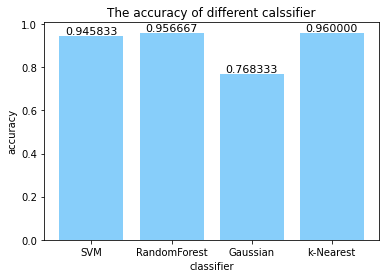

In [9]:
name = ['SVM','RandomForest','Gaussian','k-Nearest']
accu= [accuracy_SVM, accuracy_rfclf,accuracy_gnbclf, accuracy_kneighclf]
plt.bar(name, accu, color="#87CEFA")
plt.xlabel('classifier')
plt.ylabel("accuracy")
plt.title("The accuracy of different calssifier")
for a, b in zip(name, accu):
    plt.text(a, b, '%.6f' % b, ha='center', va='bottom', fontsize=11)
plt.show()

### K_fold Validation

In [13]:
def k_fold_validation(X, y, k, clf_type):
    # split the dataset
    split_len = int(len(X) / k) + 1
    splitted_X = []
    splitted_y = []
    score = 0
    for i in range(k):
        splitted_X.append(X[i*split_len:(i+1)*split_len])
        splitted_y.append(y[i*split_len:(i+1)*split_len])
    for i in range(k):
        X_test = splitted_X[i]
        y_test = splitted_y[i]
        X_train = []
        y_train = []
        for j in range(k):
            if j == i:
                continue
            for item in splitted_X[j]:
                X_train.append(item)
            for item in splitted_y[j]:
                y_train.append(item)
        # Create classifier for the method
        knn = False
        if clf_type == 'SVM':
            clf = svm.SVC()
        elif clf_type == 'RandomForest':
            clf = RandomForestClassifier()
        elif clf_type == 'Gaussian':
            clf = GaussianNB()
        else:
            knn = True
        # Train and test using the method
        if not knn:
            clf.fit(X_train, y_train)
            score += clf.score(X_test, y_test)
        else:
            result = []
            for i in range(1, 6):
                kneighclf = KNeighborsClassifier(n_neighbors=2*i-1)
                kneighclf.fit(X_train, y_train)
                result.append(kneighclf.score(X_test, y_test))
            score += max(result)
    return score / k

SVM done!
RandomForest done!
Gaussian done!
k-Nearest done!


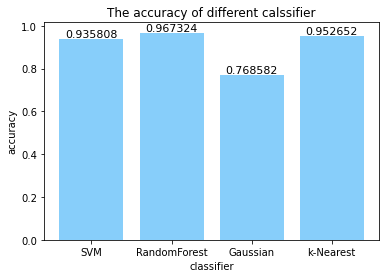

In [14]:
name = ['SVM','RandomForest','Gaussian','k-Nearest']
accu = []
for method in name:
    accu.append(k_fold_validation(X_features, y, 5, method))
    print(method, 'done!')
plt.bar(name, accu, color="#87CEFA")
plt.xlabel('classifier')
plt.ylabel("accuracy")
plt.title("The accuracy of different calssifier")
for a, b in zip(name, accu):
    plt.text(a, b, '%.6f' % b, ha='center', va='bottom', fontsize=11)
plt.show()